<a href="https://colab.research.google.com/github/poonampal/AIML/blob/master/Convolutional_Neural_Network_for_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional Neural Network for Images

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow
from tensorflow.keras import models, layers, datasets

from sklearn.metrics import classification_report, confusion_matrix


In [3]:
(x_train, y_train), (x_test,y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [8]:
y_train[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [11]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [19]:
def sample_plot(x, y, index):
  plt.figure(figsize=(10,1))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

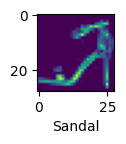

In [25]:
sample_plot(x_train,y_train, 8)

In [26]:
x_train = x_train /255
x_test = x_test /255

In [37]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [39]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
y_train[0]

9

In [41]:
cnn = models.Sequential([
    layers.Conv2D(filters=28, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='SGD', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 58s 30ms/step - loss: 0.9459 - accuracy: 0.6549
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.5462 - accuracy: 0.7946
Epoch 3/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.4677 - accuracy: 0.8283
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4222 - accuracy: 0.8466
Epoch 5/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3896 - accuracy: 0.8584


In [43]:
y_predict = cnn.predict(x_test)

313/313 [==============================] - 3s 10ms/step


In [44]:
y_predict[0]

array([1.3585613e-05, 3.9316674e-05, 4.7219844e-05, 6.0976912e-05,
       7.8631281e-05, 7.0291236e-03, 2.9540280e-04, 2.9081525e-02,
       2.5969418e-03, 9.6075726e-01], dtype=float32)

In [45]:
np.argmax(y_predict[0])

9

In [46]:
y_pred = [np.argmax(element) for element in y_predict]

In [47]:
classes[y_pred[0]]

'Ankle boot'

In [48]:
classes[y_test[0]]

'Ankle boot'

In [49]:
y_pred[:10]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [50]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [52]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.4014 - accuracy: 0.8556


[0.4013593792915344, 0.8555999994277954]